---
title: "Introducing Keras"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-04-06"
categories: [python, datacamp, machine learning, deep learning, keras, neural network]
image: "introKeras.png"

---

# Introducing Keras

The purpose of this first chapter is to introduce you to neural networks, to understand what kinds of problems they can solve, and when they should be used. Moreover, you will build several networks and save the earth by training a regression model that approximates the orbit of a meteor approaching the earth.

This **Introducing Keras** is part of [Datacamp course: Introduction to Deep Learning with Keras] There is no denying that deep learning is here to stay! A powerful innovation tool, it is used to solve complex problems arising from unstructured data. It is among the frameworks that make it easier to develop deep learning models, and it is versatile enough to build industry-ready models quickly. In this course, you will learn regression and save the earth by predicting asteroid trajectory, apply binary classification to distinguish real and fake dollar bills, learn to apply multiclass classification to decide who threw which dart at a dart board, and use neural networks to reconstruct noisy images. Additionally, you will learn how to tune your models to enhance their performance during training.

This is my learning experience of data science through DataCamp. These repository contributions are part of my learning journey through my graduate program masters of applied data sciences (MADS) at University Of Michigan, [DeepLearning.AI], [Coursera] & [DataCamp]. You can find my similar articles & more stories at my [medium] & [LinkedIn] profile. I am available at [kaggle] & [github blogs] & [github repos]. Thank you for your motivation, support & valuable feedback.

These include projects, coursework & notebook which I learned through my data science journey. They are created for reproducible & future reference purpose only. All source code, slides or screenshot are intellactual property of respective content authors. If you find these contents beneficial, kindly consider learning subscription from [DeepLearning.AI Subscription], [Coursera], [DataCamp]



[DeepLearning.AI]: https://www.deeplearning.ai
[DeepLearning.AI Subscription]: https://www.deeplearning.ai
[Coursera]: https://www.coursera.org
[DataCamp]: https://www.datacamp.com
[medium]: https://medium.com/@kamig4u
[LinkedIn]: https://www.linkedin.com/in/asadenterprisearchitect
[kaggle]: https://www.kaggle.com/kakamana
[github blogs]: https://kakamana.github.io
[github repos]: https://github.com/kakamana
[Datacamp course: Introduction to Natural Language Processing in Python]: (https://app.datacamp.com/learn/courses/introduction-to-deep-learning-with-keras)

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

# What is Keras?

* Keras + Tensorflow
    * Tensorflow's high level framework of choice
    * Keras is complementary to Tensorflow
* Deep learning framework
* Enable fast experimentation
* Runs on top of other frameworks
* Feature Engineering

![](IntroKeras-1.png)

* Why use Keras?
    * Fast industry-ready models
    * For beginners and expers
    * Less code
    * Build any architecture
    * Deploy models in multiple platforms

![](IntroKeras-2.png)




# First neural network

![](IntroKeras-3.png)
![](IntroKeras-4.png)
![](IntroKeras-5.png)
![](IntroKeras-6.png)

## Hello nets!
You're going to build a simple neural network to get a feeling of how quickly it is to accomplish this in Keras.

You will build a network that takes two numbers as an input, passes them through a hidden layer of 10 neurons, and finally outputs a single non-constrained number.

A non-constrained output can be obtained by avoiding setting an activation function in the output layer. This is useful for problems like regression, when we want our output to be able to take any non-constrained value

![](IntroKeras-6.png)

In [9]:
# Import the Sequential model and Dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add an input layer and a hidden layer with 10 neurons
model.add(Dense(10, input_shape=(2,), activation="relu"))

# Add a 1-neuron output layer
model.add(Dense(1))

# Summarise your model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                30        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


## Counting parameters

You’ve just created a neural network. Create a new one now and take some time to think about the weights of each layer. The Keras Dense layer and the Sequential model are already loaded for you to use

![](IntroKeras-8.png)

This is network you are creating

In [10]:
# Instantiate a new Sequential model
model = Sequential()

# Add a Dense layer with five neurons and three inputs
model.add(Dense(5, input_shape=(3,), activation="relu"))

# Add a final Dense layer with one neuron and no activation
model.add(Dense(1))

# Summarize your model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 5)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


## Build as shown!

You will take on a final challenge before moving on to the next lesson. Build the network shown in the picture below.

![](IntroKeras-9.png)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Instantiate a Sequential model
model = Sequential()

# Build the input and hidden layer
model.add(Dense(3,input_shape=(2,)))

# Add the ouput layer
model.add(Dense(1))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 3)                 9         
                                                                 
 dense_13 (Dense)            (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


# Surviving a meteor strike

![](IntroKeras-10.png)

## Specifying a model
You will build a simple regression model to predict the orbit of the meteor!

Your training data consist of measurements taken at time steps from -10 minutes before the impact region to +10 minutes after. Each time step can be viewed as an X coordinate in our graph, which has an associated position Y for the meteor orbit at that time step.


Note that you can view this problem as approximating a quadratic function via the use of neural networks.

![](IntroKeras-11.png)

This data is stored in two numpy arrays: one called time_steps , what we call features, and another called y_positions, with the labels. Go on and build your model! It should be able to predict the y positions for the meteor orbit at future time steps.

In [12]:
orbit = pd.read_csv('dataset/orbit.csv')
orbit.head()

,time_steps,y
0,-10.000000,100.000000
1,-9.989995,99.800000
2,-9.979990,99.600200
3,-9.969985,99.400601
4,-9.959980,99.201201


In [13]:
time_steps = orbit['time_steps'].to_numpy()
y_positions = orbit['y'].to_numpy()

In [14]:
model = Sequential()

# Add a Dense layer with 50 neurons and an input of 1 neuron
model.add(Dense(50, input_shape=(1, ), activation='relu'))

# Add two Dense layers with 50 neurons and relu activation
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))

# End your model with a Dense layer and no activation
model.add(Dense(1))
print("\nYou are closer to forecasting the meteor orbit! It's important to note we aren't using an activation function in our output layer since y_positions aren't bounded and they can take any value. Your model is built to perform a regression task")


You are closer to forecasting the meteor orbit! It's important to note we aren't using an activation function in our output layer since y_positions aren't bounded and they can take any value. Your model is built to perform a regression task


## Training
You're going to train your first model in this course, and for a good cause!

Remember that before training your Keras models you need to compile them. This can be done with the .compile() method. The .compile() method takes arguments such as the optimizer, used for weight updating, and the loss function, which is what we want to minimize. Training your model is as easy as calling the .fit() method, passing on the features, labels and a number of epochs to train for. Train it and evaluate it on this very same data, let's see if your model can learn the meteor's trajectory.

In [15]:
model.compile(optimizer='adam', loss='mse')

print('Training started..., this can take a while:')

# Fit your model on your data for 30 epochs
model.fit(time_steps, y_positions, epochs=30)

# Evaluate your model
print("Final loss value:", model.evaluate(time_steps, y_positions))
print("\nYou can check the console to see how the loss function decreased as epochs went by. Your model is now ready to make predictions on unseen data")

Training started..., this can take a while:
Epoch 1/30


2023-04-06 07:31:30.483461: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


63/63 [==============================] - 1s 5ms/step - loss: 1555.1772
Epoch 2/30
63/63 [==============================] - 0s 4ms/step - loss: 250.0806
Epoch 3/30
63/63 [==============================] - 0s 4ms/step - loss: 137.0985
Epoch 4/30
63/63 [==============================] - 0s 4ms/step - loss: 117.7206
Epoch 5/30
63/63 [==============================] - 0s 4ms/step - loss: 95.1392
Epoch 6/30
63/63 [==============================] - 0s 4ms/step - loss: 73.8897
Epoch 7/30
63/63 [==============================] - 0s 4ms/step - loss: 53.5082
Epoch 8/30
63/63 [==============================] - 0s 4ms/step - loss: 37.2037
Epoch 9/30
63/63 [==============================] - 0s 4ms/step - loss: 24.1432
Epoch 10/30
63/63 [==============================] - 0s 4ms/step - loss: 15.4662
Epoch 11/30
63/63 [==============================] - 0s 4ms/step - loss: 9.9149
Epoch 12/30
63/63 [==============================] - 0s 4ms/step - loss: 7.0810
Epoch 13/30
63/63 [==========================

## Predicting the orbit!
You've already trained a model that approximates the orbit of the meteor approaching Earth and it's loaded for you to use.

Since you trained your model for values between -10 and 10 minutes, your model hasn't yet seen any other values for different time steps. You will now visualize how your model behaves on unseen data.

Hurry up, the Earth is running out of time!

Remember np.arange(x,y) produces a range of values from x to y-1. That is the [x, y) interval.

In [16]:
def plot_orbit(model_preds):
    axeslim = int(len(model_preds) / 2)
    plt.plot(np.arange(-axeslim, axeslim + 1),np.arange(-axeslim, axeslim + 1) ** 2,
             color="mediumslateblue")
    plt.plot(np.arange(-axeslim, axeslim + 1),model_preds,color="orange")
    plt.axis([-40, 41, -5, 550])
    plt.legend(["Scientist's Orbit", 'Your orbit'],loc="lower left")
    plt.title("Predicted orbit vs Scientist's Orbit")

1/1 [==============================] - 0s 58ms/step


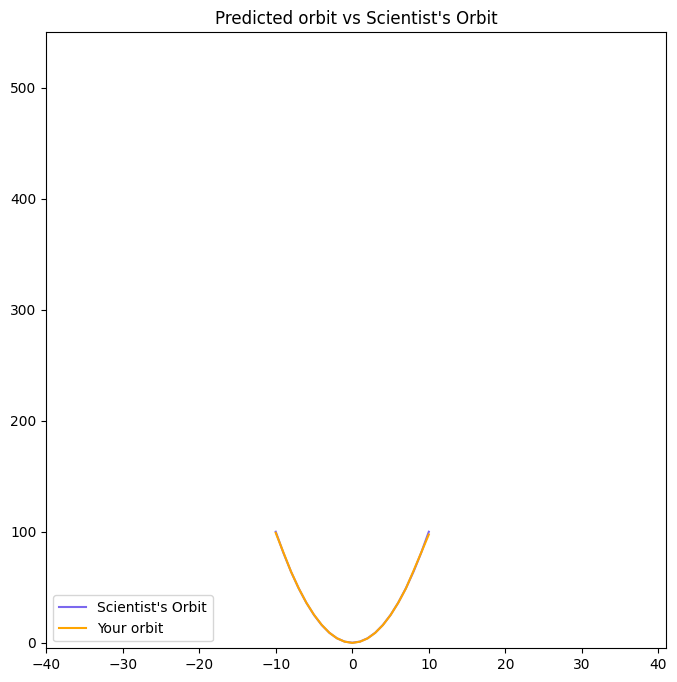

In [17]:
twenty_min_orbit = model.predict(np.arange(-10, 11))

# Plot the twenty minute orbit
plot_orbit(twenty_min_orbit)

3/3 [==============================] - 0s 11ms/step


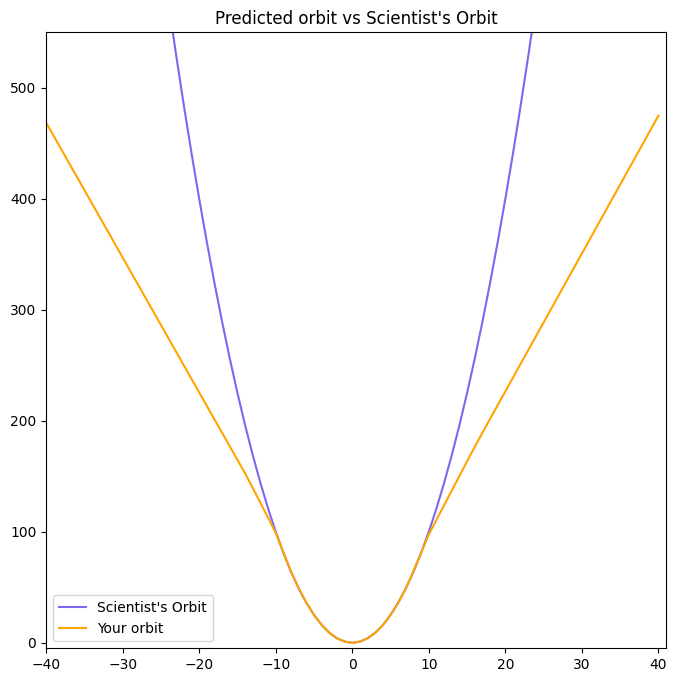

In [18]:
eighty_min_orbit = model.predict(np.arange(-40, 41))

# Plot the eighty minute orbit
plot_orbit(eighty_min_orbit)

In [20]:
print("\nYour model fits perfectly to the scientists trajectory for time values between -10 to +10, the region where the meteor crosses the impact region, so we won't be hit! However, it starts to diverge when predicting for new values we haven't trained for. This shows neural networks learn according to the data they are fed with. Data quality and diversity are very important.")


Your model fits perfectly to the scientists trajectory for time values between -10 to +10, the region where the meteor crosses the impact region, so we won't be hit! However, it starts to diverge when predicting for new values we haven't trained for. This shows neural networks learn according to the data they are fed with. Data quality and diversity are very important.
